# Paired comparison of hallmark PCs in NACT samples

Script related to figure 5d

### Aim:
- Compare hallamark NES PCA loadings pre vs post NACT

In [1]:
!python --version

Python 3.6.8 :: Anaconda custom (64-bit)


## Import packages

In [2]:
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from sklearn.decomposition import PCA

In [3]:
home = '~/git_repos/HGSOC_TME_Heterogeneity/'

## Get sample labels

### Load file

In [4]:
file_keys = home + 'Data/5/NACT_SampleLabels.txt'

sample_labels = pd.read_csv(file_keys,
                            sep='\t',
                            index_col='Well')

sample_labels.head()

,Name,Case_mRNA,NACT,Site,Bounds
Well,,,,,
A01,A01_3368A_Liver,3368,Untreated,other,in
A02,A02_3368B_Liver,3368,Treated,other,out
A03,A03_0371A_R_diaphragm,371,Untreated,other,out
A04,A04_0371B_R_diaphragm,371,Treated,other,out
A05,A05_9717A_R_ovary,9717,Untreated,ovary,in


## Load ssGSEA results

In [5]:
file_nes = home + 'Data/5/HallmarksStromaImmune_NACT_NES.txt'

data_nes = pd.read_csv(file_nes,
                       sep='\t')

data_nes.set_index('Term',
                   inplace=True)

data_nes.head()

,A01,A02,A03,A04,A05,A06,A07,A08,A09,A10,...,D12,E01,E02,E03,E04,E05,E06,E07,E08,E09
Term,,,,,,,,,,,,,,,,,,,,,
HALLMARK_TNFA_SIGNALING_VIA_NFKB,0.092696,0.159109,0.221560,0.210024,0.099785,0.118758,0.100212,0.272152,0.108368,0.099014,...,0.166682,0.180770,0.182044,0.123420,0.167660,0.177934,0.175181,0.249246,0.163605,0.283639
HALLMARK_HYPOXIA,0.186010,0.196143,0.214819,0.237168,0.192770,0.204423,0.165283,0.278923,0.201645,0.195268,...,0.213112,0.231052,0.221524,0.238599,0.243462,0.232689,0.204692,0.258383,0.231907,0.286908
HALLMARK_CHOLESTEROL_HOMEOSTASIS,0.255208,0.282680,0.285083,0.260298,0.321267,0.309121,0.292943,0.313486,0.286084,0.277111,...,0.322881,0.262719,0.292338,0.381793,0.237000,0.292132,0.267533,0.301603,0.295406,0.393218
HALLMARK_MITOTIC_SPINDLE,0.305218,0.317705,0.293826,0.255306,0.278673,0.302507,0.298289,0.265211,0.338190,0.302091,...,0.292191,0.312170,0.317407,0.400398,0.324670,0.305270,0.306001,0.298000,0.302720,0.303047
HALLMARK_WNT_BETA_CATENIN_SIGNALING,0.218775,0.238017,0.212214,0.256485,0.252541,0.250670,0.242941,0.173667,0.262190,0.294071,...,0.245270,0.289621,0.233977,0.296323,0.177104,0.233127,0.223970,0.227052,0.261404,0.235832


### Check empty cells

In [6]:
set(data_nes.isnull().sum())

{0}

### Separate matched and unmatched samples

In [7]:
matched = [3368,371,9717,8674,2359,564,7765,6965,9347]

matched_df = sample_labels[sample_labels['Case_mRNA'].isin(matched)]

unmatched_df = sample_labels[~sample_labels['Case_mRNA'].isin(matched)]

In [8]:
matched_nes_df = data_nes[matched_df.index]

unmatched_nes_df = data_nes[unmatched_df.index]

## Calculate matched PCA

In [9]:
pca = PCA(n_components=7)
pca_nes = pca.fit_transform(matched_nes_df.transpose())
len(pca_nes) # check number of data points

18

In [10]:
matched_nes_df = matched_nes_df.T
matched_nes_df.head()

Term,HALLMARK_TNFA_SIGNALING_VIA_NFKB,HALLMARK_HYPOXIA,HALLMARK_CHOLESTEROL_HOMEOSTASIS,HALLMARK_MITOTIC_SPINDLE,HALLMARK_WNT_BETA_CATENIN_SIGNALING,HALLMARK_TGF_BETA_SIGNALING,HALLMARK_IL6_JAK_STAT3_SIGNALING,HALLMARK_DNA_REPAIR,HALLMARK_G2M_CHECKPOINT,HALLMARK_APOPTOSIS,...,HALLMARK_IL2_STAT5_SIGNALING,HALLMARK_BILE_ACID_METABOLISM,HALLMARK_PEROXISOME,HALLMARK_ALLOGRAFT_REJECTION,HALLMARK_SPERMATOGENESIS,HALLMARK_KRAS_SIGNALING_UP,HALLMARK_KRAS_SIGNALING_DN,HALLMARK_PANCREAS_BETA_CELLS,StromalSignature,ImmuneSignature
A01,0.092696,0.186010,0.255208,0.305218,0.218775,0.319309,0.063204,0.283149,0.366102,0.293164,...,0.206833,0.017703,0.157014,0.101102,0.059223,0.168870,-0.111366,-0.146457,0.068301,0.074691
A02,0.159109,0.196143,0.282680,0.317705,0.238017,0.390819,0.120196,0.355469,0.367244,0.323681,...,0.200714,0.013351,0.210357,0.187103,0.088553,0.199723,-0.116319,-0.171530,0.070667,0.169467
A03,0.221560,0.214819,0.285083,0.293826,0.212214,0.323519,0.219716,0.279329,0.272018,0.368760,...,0.254291,0.068881,0.159303,0.240944,-0.013733,0.262265,-0.122007,-0.229520,0.269651,0.345730
A04,0.210024,0.237168,0.260298,0.255306,0.256485,0.275202,0.167111,0.246652,0.212474,0.323310,...,0.236441,0.069575,0.211824,0.206219,0.075459,0.241376,-0.096597,-0.139607,0.224186,0.317359
A05,0.099785,0.192770,0.321267,0.278673,0.252541,0.274844,0.080244,0.286553,0.344719,0.301616,...,0.191664,0.046353,0.200961,0.113492,0.074904,0.125993,-0.106269,-0.137008,0.023423,0.069114


## Violinplots of PCs with matched lines and statistical analysis

In [11]:
pcx = 0

In [12]:
pre = []
pre_label = []
pos = []
pos_label = []
for i,s in enumerate(matched_nes_df.index):
    
    x = pca_nes[:, pcx][i]
    l = sample_labels['Case_mRNA'][s]
    
    if sample_labels['NACT'][s] == 'Untreated':
        pre.append(x)
        pre_label.append('pre')
        
    else:
        pos.append(x)
        pos_label.append('pos')

In [13]:
pc = pre+pos
pc_label = pre_label+pos_label

In [14]:
bxplot_data = pd.DataFrame({'pc':pc, 'pc_label':pc_label})

### Plot

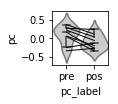

In [15]:
fig, ax = plt.subplots()
fig.set_size_inches(1,1)

sns.violinplot(x="pc_label",
               y="pc",
               data=bxplot_data,
               inner=None,
               color=".8",
               width=1,
               zorder=0)

sns.boxplot(x='pc_label',
            y='pc',
            data=bxplot_data,
            notch=True,
            fliersize=0,
            width=0.5, 
            zorder=1)

for i,s in enumerate(matched_nes_df.index):
    
    y = pca_nes[:, pcx][i]
    l = sample_labels['Case_mRNA'][s]
    
    if i%2 == 0:
        x = 0
        line = [(x,y)]
        
    else:
        x = 1
        line.append((x,y))
        (xs, ys) = zip(*line)
        
        if sample_labels['Case_mRNA'][s] in matched:                    
            ax.add_line(Line2D(xs, ys, ls='-', linewidth=1, color='k',alpha=1,zorder=2))
            
        else:
            ax.add_line(Line2D(xs, ys, ls='-', linewidth=1, color='k',alpha=1,zorder=2))
            

In [16]:
fig = ax.get_figure()
filename = '../../Figures/main/5/panels/NACT_matched_Hallmarks_PC%i_BxPlot.pdf' % pcx
fig.savefig(filename, bbox_inches='tight')

### Stastical analysis of pre vs post NACT PCs

In [17]:
import scipy.stats

p_values = []
for pcx in range(7):

    pre = []
    pos = []    
    for i,s in enumerate(matched_nes_df.index):
        
        x = pca_nes[:, pcx][i]
        l = sample_labels['Case_mRNA'][s]

        if sample_labels['NACT'][s] == 'Untreated':
            pre.append(x)

        else:
            pos.append(x)
            
    print(str(pcx)+"\n")
    
    n1 = scipy.stats.shapiro(pre)[1]
    n2 = scipy.stats.shapiro(pos)[1]
    
    n3 = scipy.stats.normaltest(pre)[1]
    n4 = scipy.stats.normaltest(pos)[1]
    
    n5 = scipy.stats.anderson(pre)
    n6 = scipy.stats.anderson(pos)
    
    if min([n1,n2]) < 0.05: # it's not normal

        print("NOT normal")

        h1 = scipy.stats.levene(pre, pos)[1]

        if h1 < 0.05:
            print("HETEROscedastic\n")
            #print(h1)
        else:
            print("HOMOscedastic\n")

    else:

        print("Normal")

        h1 = scipy.stats.bartlett(pre,pos)[1]

        if h1 < 0.05:
            print("HETEROscedastic\n")
        else:
            print("HOMOscedastic\n")
            
    if min([n1,n2,h1]) < 0.05:

        print("WILCOXON")

        print(scipy.stats.wilcoxon(pre,pos))
        
        stat, p_val = scipy.stats.wilcoxon(pre,pos)

    else:

        print("anderson")

        print(n5[0], n5[1])
        print(n6[0], n6[1])
        print("\n")

        print("PAIRED T-TEST")
        print(scipy.stats.ttest_rel(pre,pos))

        print("\n")
        
        stat, p_val = scipy.stats.ttest_rel(pre,pos)
                
    p_values.append((str(pcx),stat,p_val))

0

Normal
HOMOscedastic

anderson
0.44434809636148387 [0.507 0.578 0.693 0.808 0.961]
0.2393802526426132 [0.507 0.578 0.693 0.808 0.961]


PAIRED T-TEST
Ttest_relResult(statistic=2.959778704715287, pvalue=0.018152350547796264)


1

Normal
HOMOscedastic

anderson
0.24264078781723164 [0.507 0.578 0.693 0.808 0.961]
0.32568818011592526 [0.507 0.578 0.693 0.808 0.961]


PAIRED T-TEST
Ttest_relResult(statistic=1.530913490702759, pvalue=0.16432341958991653)


2

Normal
HOMOscedastic

anderson
0.41183898137189345 [0.507 0.578 0.693 0.808 0.961]
0.12678541583327707 [0.507 0.578 0.693 0.808 0.961]


PAIRED T-TEST
Ttest_relResult(statistic=0.5780375636425801, pvalue=0.5791417443747287)


3

NOT normal
HOMOscedastic

WILCOXON
WilcoxonResult(statistic=10.0, pvalue=0.1386406338132186)
4

Normal
HOMOscedastic

anderson
0.364061957678695 [0.507 0.578 0.693 0.808 0.961]
0.38735747786366304 [0.507 0.578 0.693 0.808 0.961]


PAIRED T-TEST
Ttest_relResult(statistic=0.25757798576770896, pvalue=0.803234376

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))
/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))
/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))
/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))
/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))
/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n)

In [18]:
p_values

[('0', 2.959778704715287, 0.018152350547796264),
 ('1', 1.530913490702759, 0.16432341958991653),
 ('2', 0.5780375636425801, 0.5791417443747287),
 ('3', 10.0, 0.1386406338132186),
 ('4', 0.25757798576770896, 0.8032343760894813),
 ('5', 0.547447508475411, 0.5990073978643795),
 ('6', 19.0, 0.6784023758521882)]

## Calculate unmatched PCA

In [19]:
pca = PCA(n_components=7)
pca_nes = pca.fit_transform(unmatched_nes_df.transpose())
len(pca_nes) # check number of data points

38

In [20]:
unmatched_nes_df = unmatched_nes_df.T
unmatched_nes_df.head()

Term,HALLMARK_TNFA_SIGNALING_VIA_NFKB,HALLMARK_HYPOXIA,HALLMARK_CHOLESTEROL_HOMEOSTASIS,HALLMARK_MITOTIC_SPINDLE,HALLMARK_WNT_BETA_CATENIN_SIGNALING,HALLMARK_TGF_BETA_SIGNALING,HALLMARK_IL6_JAK_STAT3_SIGNALING,HALLMARK_DNA_REPAIR,HALLMARK_G2M_CHECKPOINT,HALLMARK_APOPTOSIS,...,HALLMARK_IL2_STAT5_SIGNALING,HALLMARK_BILE_ACID_METABOLISM,HALLMARK_PEROXISOME,HALLMARK_ALLOGRAFT_REJECTION,HALLMARK_SPERMATOGENESIS,HALLMARK_KRAS_SIGNALING_UP,HALLMARK_KRAS_SIGNALING_DN,HALLMARK_PANCREAS_BETA_CELLS,StromalSignature,ImmuneSignature
B08,0.102155,0.173790,0.321340,0.292239,0.210714,0.208534,0.142880,0.284127,0.283415,0.320610,...,0.202247,0.069428,0.173053,0.183876,0.053270,0.109625,-0.111610,-0.138742,0.057166,0.153691
B09,0.213414,0.260004,0.367896,0.327485,0.221764,0.322622,0.147133,0.294408,0.300405,0.393212,...,0.200951,0.089117,0.231882,0.178789,0.021131,0.171754,-0.128045,-0.120304,0.082161,0.148569
B10,0.281845,0.317255,0.325445,0.300307,0.272159,0.351719,0.212973,0.313351,0.310235,0.388028,...,0.255847,0.050186,0.216154,0.224988,0.024848,0.240535,-0.150372,-0.199459,0.267027,0.292128
B11,0.255098,0.249370,0.325112,0.326019,0.228833,0.390627,0.152491,0.291585,0.280152,0.339075,...,0.217113,0.083991,0.229303,0.193689,0.042155,0.213631,-0.158927,-0.182808,0.169770,0.188234
B12,0.067317,0.197787,0.372217,0.389858,0.307239,0.357170,0.016424,0.365017,0.486701,0.301297,...,0.186710,0.003302,0.202585,0.061255,0.042460,0.178223,-0.202232,-0.203925,0.013678,-0.039696


## Violinplots of PCs with unmatched lines and statistical analysis


In [21]:
pcx = 0

In [22]:
pre = []
pre_label = []
pos = []
pos_label = []
for i,s in enumerate(unmatched_nes_df.index):
    
    x = pca_nes[:, pcx][i]
    l = sample_labels['Case_mRNA'][s]
    
    if sample_labels['NACT'][s] == 'Untreated':
        pre.append(x)
        pre_label.append('pre')
        
    else:
        pos.append(x)
        pos_label.append('pos')

In [23]:
pc = pre+pos
pc_label = pre_label+pos_label

In [24]:
bxplot_data = pd.DataFrame({'pc':pc, 'pc_label':pc_label})

### Plot

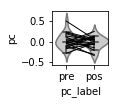

In [25]:
fig, ax = plt.subplots()
fig.set_size_inches(1,1)

sns.violinplot(x="pc_label",
               y="pc",
               data=bxplot_data,
               inner=None,
               color=".8",
               width=1,
               zorder=0)

sns.boxplot(x='pc_label',
            y='pc',
            data=bxplot_data,
            notch=True,
            fliersize=0,
            width=0.5, 
            zorder=1)

for i,s in enumerate(unmatched_nes_df.index):
    
    y = pca_nes[:, pcx][i]
    l = sample_labels['Case_mRNA'][s]
    
    if i%2 == 0:
        x = 0
        line = [(x,y)]
        
    else:
        x = 1
        line.append((x,y))
        (xs, ys) = zip(*line)
        
        if sample_labels['Case_mRNA'][s] in matched:                    
            ax.add_line(Line2D(xs, ys, ls='-', linewidth=1, color='k',alpha=1,zorder=2))
            
        else:
            ax.add_line(Line2D(xs, ys, ls='-', linewidth=1, color='k',alpha=1,zorder=2))
 

In [26]:
fig = ax.get_figure()
filename = '../../Figures/main/5/panels/NACT_unmatched_Hallmarks_PC%i_BxPlot.pdf' % pcx
fig.savefig(filename, bbox_inches='tight')

### Stastical analysis of pre vs post NACT PCs

In [27]:
p_values = []
for pcx in range(7):

    pre = []
    pos = []    
    for i,s in enumerate(unmatched_nes_df.index):
        
        x = pca_nes[:, pcx][i]
        l = sample_labels['Case_mRNA'][s]

        if sample_labels['NACT'][s] == 'Untreated':
            pre.append(x)

        else:
            pos.append(x)
            
    print(str(pcx)+"\n")
    
    n1 = scipy.stats.shapiro(pre)[1]
    n2 = scipy.stats.shapiro(pos)[1]
    
    n3 = scipy.stats.normaltest(pre)[1]
    n4 = scipy.stats.normaltest(pos)[1]
    
    n5 = scipy.stats.anderson(pre)
    n6 = scipy.stats.anderson(pos)
    
    if min([n1,n2]) < 0.05: # it's not normal

        print("NOT normal")

        h1 = scipy.stats.levene(pre, pos)[1]

        if h1 < 0.05:
            print("HETEROscedastic\n")
            #print(h1)
        else:
            print("HOMOscedastic\n")

    else:

        print("Normal")

        h1 = scipy.stats.bartlett(pre,pos)[1]

        if h1 < 0.05:
            print("HETEROscedastic\n")
        else:
            print("HOMOscedastic\n")
            
    if min([n1,n2,h1]) < 0.05:

        print("WILCOXON")

        print(scipy.stats.wilcoxon(pre,pos))
        
        stat, p_val = scipy.stats.wilcoxon(pre,pos)

    else:

        print("anderson")

        print(n5[0], n5[1])
        print(n6[0], n6[1])
        print("\n")

        print("PAIRED T-TEST")
        print(scipy.stats.ttest_rel(pre,pos))

        print("\n")
        
        stat, p_val = scipy.stats.ttest_rel(pre,pos)
                
    p_values.append((str(pcx),stat,p_val))

0

Normal
HOMOscedastic

anderson
0.27209235846891744 [0.505 0.575 0.69  0.804 0.957]
0.4393350048841107 [0.505 0.575 0.69  0.804 0.957]


PAIRED T-TEST
Ttest_relResult(statistic=0.9909817613402748, pvalue=0.33482991200888024)


1

Normal
HOMOscedastic

anderson
0.21073268288001046 [0.505 0.575 0.69  0.804 0.957]
0.13681191328095466 [0.505 0.575 0.69  0.804 0.957]


PAIRED T-TEST
Ttest_relResult(statistic=2.3332504781867898, pvalue=0.031434452872753)


2

Normal
HOMOscedastic

anderson
0.26623320752802115 [0.505 0.575 0.69  0.804 0.957]
0.43108677788182703 [0.505 0.575 0.69  0.804 0.957]


PAIRED T-TEST
Ttest_relResult(statistic=-2.899636378374787, pvalue=0.009552893860822444)


3

Normal
HOMOscedastic

anderson
0.24189565842226557 [0.505 0.575 0.69  0.804 0.957]
0.23306449639490978 [0.505 0.575 0.69  0.804 0.957]


PAIRED T-TEST
Ttest_relResult(statistic=-4.806246429534449, pvalue=0.0001414561967676117)


4

Normal
HOMOscedastic

anderson
0.3568700717966671 [0.505 0.575 0.69  0.804 0.

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))
/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))
/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))
/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))
/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))
/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % 

In [28]:
p_values

[('0', 0.9909817613402748, 0.33482991200888024),
 ('1', 2.3332504781867898, 0.031434452872753),
 ('2', -2.899636378374787, 0.009552893860822444),
 ('3', -4.806246429534449, 0.0001414561967676117),
 ('4', -0.7272804923617269, 0.47640789765978875),
 ('5', -0.3630534275947495, 0.720793393204544),
 ('6', -1.7716707657454824, 0.09337772667224901)]

# End script